## 91APP料視覺化實作


* 1.依日期分群：
* 2.依月份分群：
* 3.依星期幾分群：
* 4.依小時幾分群：

In [1]:
%matplotlib inline
import requests
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns

In [2]:
#read 91APP DartaSets
df = pd.read_csv(r'C:\Users\chenhur\Documents\GitHub\Showa_CsxPython\Ntu_DataSet\Ntu_Orders.csv')

In [3]:
#ADD new column dateID
df['new_DateId'] = pd.to_datetime(df['DateId'].astype(str), format='%Y%m%d')

In [32]:
df.columnsb

Index(['﻿SalesOrderSlaveId', 'DateId', 'MemberId', 'TradesOrderSlaveId',
       'ShopId', 'SalePageId', 'TradesOrderGroupCode', 'TrackSourceTypeDef',
       'TrackChannelTypeDef', 'TrackDeviceTypeDef', 'LevelOneCategoryName',
       'LevelTwoCategoryName', 'LevelThreeCategoryName',
       'LevelFourCategoryName', 'IsMajor', 'IsGift', 'Quantity', 'UnitPrice',
       'PromotionDiscount', 'EcouponDiscount', 'SalesOrderSlaveTotalPayment',
       'SalesOrderSlaveDateTime', 'SalesOrderSlaveStatusDef',
       'PayProfileTypeDef', 'ShippingProfileTypeDef', 'EcouponId',
       'IsSalePageGift', 'new_DateId', 'month'],
      dtype='object')

In [34]:
df.head(3)

,﻿SalesOrderSlaveId,DateId,MemberId,TradesOrderSlaveId,ShopId,SalePageId,TradesOrderGroupCode,TrackSourceTypeDef,TrackChannelTypeDef,TrackDeviceTypeDef,...,EcouponDiscount,SalesOrderSlaveTotalPayment,SalesOrderSlaveDateTime,SalesOrderSlaveStatusDef,PayProfileTypeDef,ShippingProfileTypeDef,EcouponId,IsSalePageGift,new_DateId,month
0,26914456,20170103,48D5DE26-236E-4854-8474-B0DCEAFF4F42,26971960,1317,9804,b'q\x14\xa49\xaa\\\xecs\xff6wH\xfbXd\x93\xfbf\...,Web,Brand,Mobile,...,0.0,374.0,2017-01-03 23:11:47.207,Finish,SevenEleven,SevenEleven,NaN,False,2017-01-03,01
1,26914457,20170103,48D5DE26-236E-4854-8474-B0DCEAFF4F42,26971961,1317,9804,b'q\x14\xa49\xaa\\\xecs\xff6wH\xfbXd\x93\xfbf\...,Web,Brand,Mobile,...,0.0,374.0,2017-01-03 23:11:47.223,Finish,SevenEleven,SevenEleven,NaN,False,2017-01-03,01
2,26767644,20170101,C8B989DB-05F9-42D3-BD4F-E203482C5E58,26825136,1317,10118,b'\x1d\x8f}\x12lu>.&\xfc\xbc\xe0\xd2\xad\xe5\x...,Web,Brand,Mobile,...,0.0,316.0,2017-01-01 17:21:32.113,Finish,Family,Family,NaN,False,2017-01-01,01


 # 藍色線是月銷量 綠色線是是否有使用折價劵
 * 想要藉此觀察銷量和折價劵關係


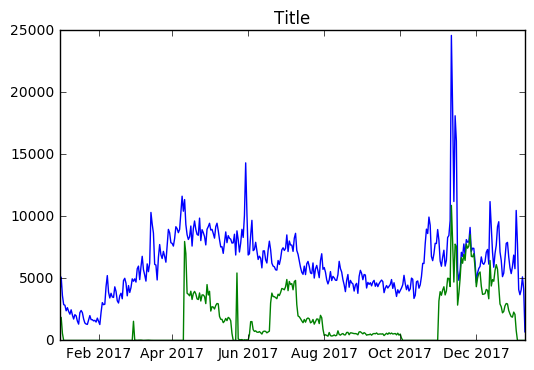

In [29]:
data_Quan = df.groupby(by='new_DateId')['Quantity'].sum()
data_Gift = df.groupby(by='new_DateId')['IsGift'].sum()
plt.title("Title")
plt.plot(data_Quan)
data_Gift = data_Gift*5
plt.plot(data_Gift)
plt.show()a

* 選取2017年前半年的資料<b/>

data = df[df.new_DateId.between('2017-01-01','2017-06-30')]



* 依月份分群

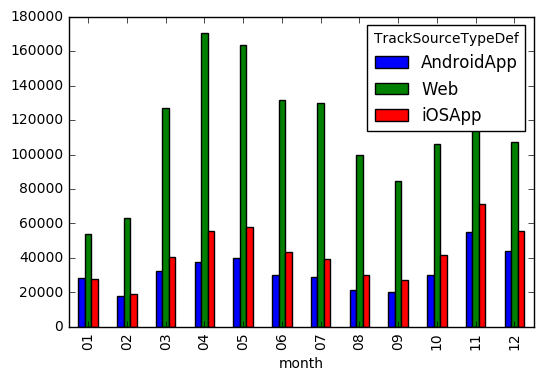

In [23]:
from datetime import datetime

#dt = datetime.strptime(a , "%Y-%m-%d').strftime('%m')

df['month'] = df['new_DateId'].dt.strftime('%m')
df.groupby(['month', 'TrackSourceTypeDef']).size().unstack().plot.bar()

In [21]:
df.groupby(['month', 'TrackSourceTypeDef']).size()

month  TrackSourceTypeDef
01     AndroidApp             28173
       Web                    53872
       iOSApp                 27819
02     AndroidApp             18142
       Web                    62859
       iOSApp                 19004
03     AndroidApp             32184
       Web                   127294
       iOSApp                 40482
04     AndroidApp             37473
       Web                   170283
       iOSApp                 55793
05     AndroidApp             40107
       Web                   163661
       iOSApp                 57643
06     AndroidApp             29896
       Web                   131547
       iOSApp                 43265
07     AndroidApp             28736
       Web                   130209
       iOSApp                 39306
08     AndroidApp             21567
       Web                    99557
       iOSApp                 29948
09     AndroidApp             20316
       Web                    84898
       iOSApp                 27166
10

In [22]:
df.groupby(['month', 'TrackSourceTypeDef']).size().unstack()

TrackSourceTypeDef,AndroidApp,Web,iOSApp
month,,,
01,28173,53872,27819
02,18142,62859,19004
03,32184,127294,40482
04,37473,170283,55793
05,40107,163661,57643
06,29896,131547,43265
07,28736,130209,39306
08,21567,99557,29948
09,20316,84898,27166


In [38]:
df.groupby(['LevelThreeCategoryName']).count()

,﻿SalesOrderSlaveId,DateId,MemberId,TradesOrderSlaveId,ShopId,SalePageId,TradesOrderGroupCode,TrackSourceTypeDef,TrackChannelTypeDef,TrackDeviceTypeDef,...,EcouponDiscount,SalesOrderSlaveTotalPayment,SalesOrderSlaveDateTime,SalesOrderSlaveStatusDef,PayProfileTypeDef,ShippingProfileTypeDef,EcouponId,IsSalePageGift,new_DateId,month
LevelThreeCategoryName,,,,,,,,,,,,,,,,,,,,,
上衣,1403194,1403194,1403194,1403194,1403194,1403194,1403194,1403194,1403194,1403194,...,1403194,1403194,1403194,1403194,1403194,1403194,285550,1403194,1403194,1403194
下著,505104,505104,505104,505104,505104,505104,505104,505104,505104,505104,...,505104,505104,505104,505104,505104,505104,103250,505104,505104,505104
內衣褲、小衣物收納,43,43,43,43,43,43,43,43,43,43,...,43,43,43,43,43,43,4,43,43,43
內褲,13505,13505,13505,13505,13505,13505,13505,13505,13505,13505,...,13505,13505,13505,13505,13505,13505,2246,13505,13505,13505
其他,3749,3749,3749,3749,3749,3749,3749,3749,3749,3749,...,3749,3749,3749,3749,3749,3749,1046,3749,3749,3749
其他女鞋,5621,5621,5621,5621,5621,5621,5621,5621,5621,5621,...,5621,5621,5621,5621,5621,5621,1201,5621,5621,5621
其它品牌區,53,53,53,53,53,53,53,53,53,53,...,53,53,53,53,53,53,3,53,53,53
包包、小物收納、抽屜隔板,452,452,452,452,452,452,452,452,452,452,...,452,452,452,452,452,452,71,452,452,452
圍巾/披肩/襪品,57944,57944,57944,57944,57944,57944,57944,57944,57944,57944,...,57944,57944,57944,57944,57944,57944,17914,57944,57944,57944


In [ ]:
df['month'] = df['new_DateId'].dt.strftime('%m')
df.groupby(['month', 'TrackSourceTypeDef']).size().unstack().plot.bar()

In [53]:
df.LevelThreeCategoryName.nunique()

33

In [ ]:
df.LevelThreeCategoryName